In [13]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())

#creating 2 columns to identify source file and if ios or android
df_v3 = pd.read_csv(root / "data" / "processed" / "merged" / "state1_clean.csv", header=0)
df_v3.head() 

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
0,0,android_turns.csv,4.0,10.394929,7.244125,0.016991,2.0,1.480796,17.323687,6.789408,1.046972,9.521707,69.319600,22.941639
1,0,android_turns.csv,4.0,9.401910,7.497719,0.016103,2.0,1.693853,6.197542,10.101060,1.153392,11.245602,84.723694,20.737572
2,0,android_turns.csv,5.0,11.290954,4.244563,0.008359,2.0,21.173470,11.229438,9.081976,5.708309,24.616348,105.462135,18.996666
3,0,android_turns.csv,5.0,12.743101,3.173500,0.007654,1.0,15.306123,10.714942,13.421639,3.099853,17.929585,57.610783,23.959110
4,0,android_turns.csv,5.0,8.986107,5.990321,0.013587,0.0,19.387754,2.729067,20.937756,1.197121,2.787075,16.806042,91.713660


In [15]:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53944 entries, 0 to 53943
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_ios                          53944 non-null  int64  
 1   source_file                     53944 non-null  object 
 2   eventType                       53944 non-null  float64
 3   eventSampleSpeed                53944 non-null  float64
 4   eventDurationSeconds            53944 non-null  float64
 5   eventMilesDriven                53944 non-null  float64
 6   eventSensorDetectionMthd        53944 non-null  float64
 7   eventGPSSignalStrength          53944 non-null  float64
 8   eventStartSpeed                 53944 non-null  float64
 9   eventEndSpeed                   53944 non-null  float64
 10  memsMedianHorizontalNorm        53944 non-null  float64
 11  gyro_angular_change_per_second  53944 non-null  float64
 12  gyroAngleChange                 

In [16]:
df_v3.drop(columns=['source_file'], inplace=True)

sub_df_left = df_v3[df_v3['eventType'] == 4]
sub_df_right = df_v3[df_v3['eventType'] == 5]

In [17]:
scaler =StandardScaler()

X_features = sub_df_left.drop(columns=['eventType'])
features = scaler.fit_transform(X_features)
scaled_df = pd.DataFrame(features,columns=X_features.columns)

# Print the scaled data
X = scaled_df.values
scaled_df.head(2)


,is_ios,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
0,-7.057567,-0.683309,0.736331,-0.309477,0.863878,-1.952891,0.313634,-1.341506,-0.911557,-0.575256,0.135539,-0.299123
1,-7.057567,-0.816295,0.824479,-0.355795,0.863878,-1.850154,-0.939736,-0.913205,-0.808508,-0.267585,0.539189,-0.371133


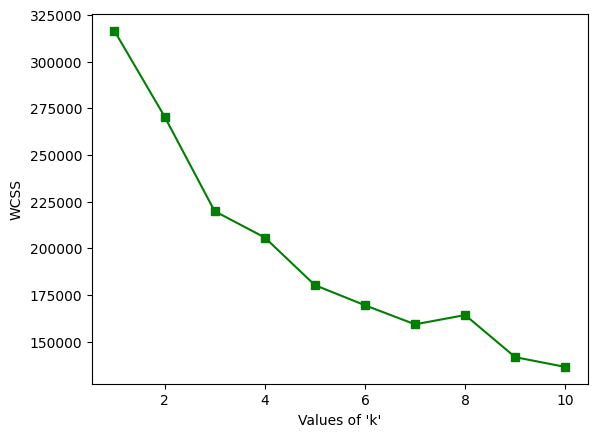

In [18]:
wcss = {} 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss[i] = kmeans.inertia_
    
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette_scores = {}
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels_k = kmeans_model.fit_predict(X)
    if k == 1:
        silhouette_scores[k] = None  # Silhouette score is not defined for k=1
    else:
        silhouette_scores[k] = silhouette_score(X, labels_k)

for k, score in silhouette_scores.items():
    print(f"k={k}: Silhouette Score = {score:.4f}" if score is not None else f"k={k}: Silhouette Score = N/A")

k=1: Silhouette Score = N/A
k=2: Silhouette Score = 0.1775
k=3: Silhouette Score = 0.2187
k=4: Silhouette Score = 0.2078
k=5: Silhouette Score = 0.1680
k=6: Silhouette Score = 0.1742
k=7: Silhouette Score = 0.1768
k=8: Silhouette Score = 0.1689
k=9: Silhouette Score = 0.1823
k=10: Silhouette Score = 0.1759


In [20]:
results = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features)

    sil = silhouette_score(features, labels)
    ch = calinski_harabasz_score(features, labels)

    results.append((k, sil, ch))

for r in results:
    print(f"k={r[0]} | Silhouette={r[1]:.3f} | CH Score={r[2]:.0f}")

k=2 | Silhouette=0.178 | CH Score=4466
k=3 | Silhouette=0.219 | CH Score=5786
k=4 | Silhouette=0.208 | CH Score=4723
k=5 | Silhouette=0.168 | CH Score=4974
k=6 | Silhouette=0.174 | CH Score=4567
k=7 | Silhouette=0.177 | CH Score=4332
k=8 | Silhouette=0.169 | CH Score=3486
k=9 | Silhouette=0.182 | CH Score=4061


In [21]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
sub_df_left['cluster'] = kmeans.fit_predict(X)

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_27467/2371074905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_left['cluster'] = kmeans.fit_predict(X)


In [22]:
kmeans.cluster_centers_

array([[-0.07910321,  1.32289434,  2.60733574,  3.25567166,  0.34299833,
        -0.06574654,  1.19554647,  1.28054506, -0.52244641, -0.72243205,
         1.18560416,  0.73599317],
       [ 0.11088594,  0.26562573,  0.14905972,  0.14458381,  0.54079973,
        -0.09864263,  0.24593347,  0.3113311 ,  0.4735376 ,  0.36610833,
         0.40194393, -0.14314738],
       [ 0.07054019, -0.34235241, -0.88376283, -0.5568917 , -1.28216729,
         0.03648121, -0.28408165, -0.41340752, -0.02152737, -0.52917316,
        -1.09075299,  0.15365662],
       [-0.17692928, -0.7583755 ,  0.24858489, -0.33564304,  0.47025332,
         0.034081  , -0.71065755, -0.66601715, -0.33976493,  0.46946054,
         0.56840052, -0.51217754],
       [ 0.07774585,  1.86324402, -0.03411063,  0.68605993,  0.06128116,
         0.11410858,  1.68129667,  1.64491346, -0.05894076, -0.87445875,
        -0.64895418,  1.29044603]])

In [23]:
pca=PCA(n_components=2)

reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])

#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,-0.688593,1.011600
1,-1.178847,1.518824
2,-1.330571,-0.127692
3,0.333261,0.673914
4,-0.557307,0.559129


In [24]:
centers=pca.transform(kmeans.cluster_centers_)

# reduced centers
centers

array([[ 4.14656441,  2.07956778],
       [ 0.42563714,  0.63675657],
       [-0.92300291, -1.84845839],
       [-1.24877801,  1.06400894],
       [ 3.20580078, -1.30691258]])

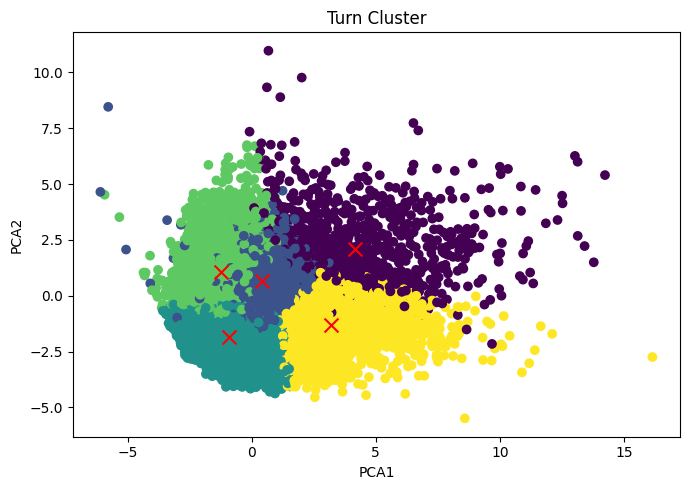

In [25]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Turn Cluster')
plt.tight_layout()

In [26]:
sub_df_left.groupby('cluster').mean(numeric_only=True).T

cluster,0,1,2,3,4
is_ios,0.969302,0.995591,0.990112,0.955775,0.991481
eventType,4.000000,4.000000,4.000000,4.000000,4.000000
eventSampleSpeed,25.355915,17.482756,12.943954,9.834713,29.427495
eventDurationSeconds,12.631203,5.554351,2.583698,5.839006,5.029612
eventMilesDriven,0.085301,0.025693,0.012256,0.016483,0.036114
eventSensorDetectionMthd,1.532093,1.709025,0.066067,1.644737,1.276296
eventGPSSignalStrength,5.394997,5.324069,5.605425,5.603571,5.768908
eventStartSpeed,25.130574,16.726316,12.020519,8.231161,29.481914
eventEndSpeed,27.045412,19.570350,13.969079,12.011968,29.898046
memsMedianHorizontalNorm,1.448534,2.476758,1.966125,1.638075,1.928030


In [27]:
kmeans=KMeans(n_clusters=7)
kmeans.fit(X)
sub_df_left['cluster'] = kmeans.fit_predict(X)

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_27467/1366429012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_left['cluster'] = kmeans.fit_predict(X)


In [28]:
kmeans.cluster_centers_

array([[ 1.41691894e-01, -2.40538845e-01,  2.63641450e-02,
        -1.62740988e-01,  3.03182356e-01,  1.99691689e+00,
        -2.43253891e-01, -1.80344999e-01,  2.53891909e-02,
         5.37047297e-01,  3.47461085e-01, -3.81643713e-01],
       [ 8.79883482e-02,  2.13935048e+00,  9.25820069e-01,
         1.92774234e+00,  3.26208401e-01,  1.09146670e-01,
         1.94061054e+00,  1.95049482e+00, -1.65825739e-01,
        -8.11808439e-01, -2.90063284e-02,  1.13504445e+00],
       [ 1.41691894e-01, -7.39507454e-01,  3.64526251e-01,
        -2.63577249e-01,  5.35322096e-01, -3.98998024e-01,
        -6.92765228e-01, -6.40656884e-01, -3.42198925e-01,
         3.95536122e-01,  6.37003174e-01, -4.78137454e-01],
       [ 1.41691894e-01,  1.11696099e-01, -5.60935653e-01,
        -2.47580326e-01, -1.11485312e+00, -8.73587485e-02,
         8.78250691e-02,  3.39576648e-02, -3.16938956e-01,
        -1.37187964e+00, -1.20356548e+00,  1.96265043e+00],
       [ 1.41691894e-01, -3.81579673e-01, -9.5221859

In [29]:
pca=PCA(n_components=2)

reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])

#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,-0.688593,1.011600
1,-1.178847,1.518824
2,-1.330571,-0.127692
3,0.333261,0.673914
4,-0.557307,0.559129


In [30]:
centers=pca.transform(kmeans.cluster_centers_)

# reduced centers
centers

array([[-0.57135993,  0.59731925],
       [ 4.32491884, -0.10063479],
       [-1.12141634,  1.16282955],
       [ 0.56753308, -2.47009386],
       [-1.22383149, -1.60539057],
       [-0.56587399,  0.52627844],
       [ 0.64146173,  0.577559  ]])

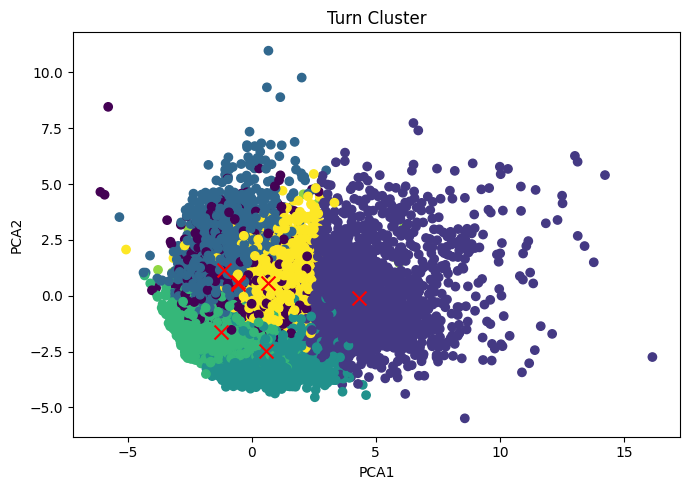

In [31]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Turn Cluster')
plt.tight_layout()

In [32]:
sub_df_left.groupby('cluster').mean(numeric_only=True).T

cluster,0,1,2,3,4,5,6
is_ios,1.000000,0.992534,1.000000,1.000000,1.000000,0.000000,1.000000
eventType,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
eventSampleSpeed,13.707105,31.479731,9.973194,16.329372,12.649010,14.277950,18.268303
eventDurationSeconds,5.202898,7.788768,6.169061,3.514042,2.386052,5.122660,5.661103
eventMilesDriven,0.019819,0.059873,0.017844,0.018181,0.011293,0.018163,0.026970
eventSensorDetectionMthd,1.494794,1.515139,1.704290,0.217451,0.055875,1.215569,1.724388
eventGPSSignalStrength,9.672673,5.755750,4.703400,5.349284,5.406857,5.841104,4.688878
eventStartSpeed,12.386107,31.772764,8.389880,15.317685,11.823694,12.530164,17.647583
eventEndSpeed,15.774606,32.250219,12.205750,17.422693,13.616477,16.246220,20.196308
memsMedianHorizontalNorm,2.015105,1.816993,1.635791,1.660878,2.135231,1.736616,2.433454


In [33]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
sub_df_left['cluster'] = kmeans.fit_predict(X)

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_27467/208876394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_left['cluster'] = kmeans.fit_predict(X)


In [34]:
kmeans.cluster_centers_

array([[ 1.40409061e-01,  1.36730103e+00,  5.08327668e-01,
         1.06901754e+00,  1.26822875e-01,  1.86463723e-02,
         1.25889522e+00,  1.24355778e+00, -6.29512562e-02,
        -7.00002753e-01, -1.41147847e-01,  9.58678581e-01],
       [ 1.41691894e-01, -3.78155641e-01, -1.43162209e-01,
        -2.95494344e-01, -3.56691691e-02, -8.12176115e-03,
        -3.46215224e-01, -3.44945175e-01,  2.41588929e-02,
         1.88217684e-01,  3.37435806e-02, -2.57095915e-01],
       [-7.05756676e+00, -3.74965516e-02,  8.66182112e-02,
        -3.57546780e-02,  1.97181657e-02,  1.15330124e-01,
        -1.11049911e-01,  5.49051778e-03, -2.61956644e-01,
         2.29516451e-01,  2.10717468e-01, -3.40700543e-01]])

In [35]:
pca=PCA(n_components=2)

reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])

centers=pca.transform(kmeans.cluster_centers_)

#Reduced Features
reduced_X.head()


,PCA1,PCA2
0,-0.688593,1.011600
1,-1.178847,1.518824
2,-1.330571,-0.127692
3,0.333261,0.673914
4,-0.557307,0.559129


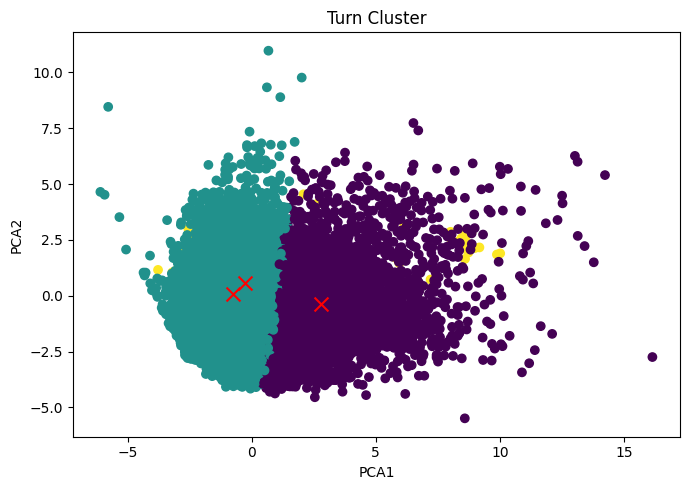

In [36]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Turn Cluster')
plt.tight_layout()

In [37]:
sub_df_left.groupby('cluster').mean(numeric_only=True).T

cluster,0,1,2
is_ios,0.999821,1.000000,0.000000
eventType,4.000000,4.000000,4.000000
eventSampleSpeed,25.719565,12.676520,15.217282
eventDurationSeconds,6.591897,4.713796,5.374957
eventMilesDriven,0.043447,0.017261,0.022237
eventSensorDetectionMthd,1.336487,1.189383,1.239382
eventGPSSignalStrength,5.572163,5.513143,5.769898
eventStartSpeed,25.726273,11.470064,13.553773
eventEndSpeed,26.791880,14.496933,17.204490
memsMedianHorizontalNorm,1.923423,2.013233,1.717824


In [43]:
sub_df_left.head()

AttributeError: 'NoneType' object has no attribute 'head'